In [ ]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
#!pip3 install -e git+https://github.com/harrispirie/stmpy.git#egg=stmpy
%pylab inline
import stmpy
import stmpy.driftcorr as dfc
import scipy as sp
from dset_utils import *
from numpy import *

!pip install tqdm

In [ ]:
import PIL
from tqdm import tqdm
import os
import pandas as pd

dpath_root = './frcnn-from-scratch-with-keras/'

!rm -rf ./obj_detection_matt/frcnn-from-scratch-with-keras/train_imgs
!rm -rf ./obj_detection_matt/frcnn-from-scratch-with-keras/test_imgs
!mkdir ./obj_detection_matt/frcnn-from-scratch-with-keras/train_imgs
!mkdir ./obj_detection_matt/frcnn-from-scratch-with-keras/test_imgs

z0 = generate_map(50, 320, 1)
a = numpy.asarray([ ['image_name','type', 'xmin', 'xmax', 'ymin', 'ymax'] ])
n = 100
test_pct = .2
rows = []
for a in tqdm(range(n)):
    z, p, w = generate_image()
    im = PIL.Image.fromarray(z)
    if im.mode != 'RGB':
        im = im.convert('RGB')
    impath = None
    if a<(n*test_pct):
        #impath = os.path.join(os.path.abspath('.'),f'keras-frcnn/test_imgs/{a}.jpg')
        impath = f'test_imgs/{a}.jpg'
    else:
        #impath = os.path.join(os.path.abspath('.'),f'keras-frcnn/train_imgs/{a}.jpg')
        impath = f'train_imgs/{a}.jpg'
    
    im.save(os.path.join(dpath_root,impath))
    bboxes = get_bboxes(p,w).astype(int)
    for b in bboxes:
        rows.append([impath, 'imp']+list(b))
df = pd.DataFrame.from_records(rows)
df.columns = ['fpath', 'type', 'xmin', 'xmax', 'ymin', 'ymax']
df = df[['fpath', 'xmin', 'ymin', 'xmax','ymax','type']]
df.to_csv(os.path.join(dpath_root,'demo_input.txt'), index=False, sep=',', header=None)


mkdir: cannot create directory ‘./obj_detection_matt/frcnn-from-scratch-with-keras/train_imgs’: No such file or directory
mkdir: cannot create directory ‘./obj_detection_matt/frcnn-from-scratch-with-keras/test_imgs’: No such file or directory


100%|██████████| 100/100 [00:25<00:00,  3.95it/s]


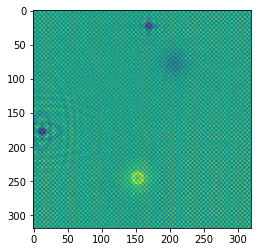

In [83]:
z, p, w = generate_image()
imshow(z)

In [84]:
get_bboxes(p,w)

array([[114.21142655, 191.18601381, 207.23682746, 284.21141472],
       [  0.        ,  93.77183133,  96.27050432, 257.91713756],
       [133.13214688, 204.97509498,   0.        ,  58.98813022],
       [182.0140446 , 229.55717202,  54.13913409, 101.68226151]])

In [87]:
w[0]

38.48729362755438

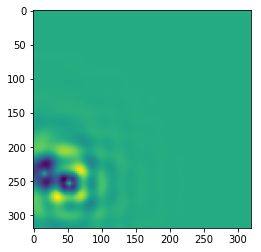

In [26]:
#Params
num = 10
i = 1
d1=random.randint(20,80)/100
d2=random.randint(20,80)/100
d3=random.randint(20,80)/100

x0 = random.random(num) * 50
y0 = random.random(num) * 50

z0 = generate_map(50, 320, 1)

_, imp = get_imp(z0, 50, center=[x0[i], y0[i]], decay=d1, a=10, ratio=5, itype='1')
_, imp2 = get_imp(z0, 50, center=[x0[i+1], y0[i+1]], decay=d1, a=10, ratio=5, itype='0')

imps = imp+imp2

plt.imshow(imps)

In [23]:
def get_mask(imp):
    rsc = (imp-imp.min())/(imp-imp.min()).max()
    plt.imshow(rsc>.3)

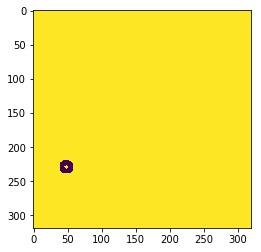

In [24]:
get_mask(imps)